In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup

# Selenium Questions and Parsing HTML Questions

### Question 1
Using Selenium, create a program that will open up the google wepbage, search for "Cute Puppies"and then close the webpage.

In [6]:
driver = webdriver.Chrome(executable_path='C:\\Users\\daiya\\VisualStudioProjects\\DS2022\\week-026\\Assignment\\chromedriver.exe')
driver.get("http://www.google.com")
search_box = driver.find_element(By.NAME, "q")
driver.implicitly_wait(1)
search_button = driver.find_element(By.NAME, "btnK")
search_box.send_keys("Cute Puppies")
search_button.click()
driver.close()

C:\Users\daiya\AppData\Local\Temp\ipykernel_18108\1554789565.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='C:\\Users\\daiya\\VisualStudioProjects\\DS2022\\week-026\\Assignment\\chromedriver.exe')


# Question 2

Using Selenium, create a program that will open up https://www.basketball-reference.com/ and return the standings of all the teams.

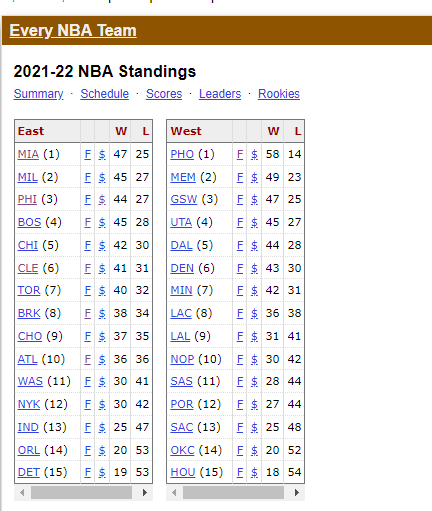


In [92]:
driver = webdriver.Chrome(executable_path='C:\\Users\\daiya\\VisualStudioProjects\\DS2022\\week-026\\Assignment\\chromedriver.exe')
driver.get("https://www.basketball-reference.com/")
standings = driver.find_element(By.ID, "teams")
print(standings.get_attribute('innerHTML'))
driver.close()

C:\Users\daiya\AppData\Local\Temp\ipykernel_18108\3688596163.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='C:\\Users\\daiya\\VisualStudioProjects\\DS2022\\week-026\\Assignment\\chromedriver.exe')



		<h2><a href="/teams/">Every NBA Team</a></h2>
		<h3>2021-22 NBA Standings</h3>
<p>
  <small>
    <a href="/leagues/NBA_2022.html">Summary</a>
    &nbsp;·&nbsp;
    <a href="/leagues/NBA_2022_games.html">Schedule</a>
    &nbsp;·&nbsp;
    <a href="/boxscores/">Scores</a>
    &nbsp;·&nbsp;
    <a href="/leagues/NBA_2022_leaders.html">Leaders</a>
    &nbsp;·&nbsp;
    <a href="/leagues/NBA_2022_rookies.html">Rookies</a>
  </small>
</p>

<div class="data_grid section_wrapper">
<div id="all_confs_standings_E" class="table_wrapper">

<div class="section_heading assoc_confs_standings_E" id="confs_standings_E_sh">
  <span class="section_anchor" id="confs_standings_E_link" data-label=""></span><h2></h2>    <div class="section_heading_text">
      <ul>
      </ul>
    </div>
    		
</div>
<div class="table_container is_setup" id="div_confs_standings_E">
    
    <table class="suppress_all sortable stats_table now_sortable" id="confs_standings_E" data-cols-to-freeze=",1">
    <caption> Table</

# Questions on Database 

### Question 1:

Create a Database from the API endpoint supplied.

https://data.cityofnewyork.us/resource/jb7j-dtam.json


You should have two tables in your database. One table that contains your raw data, and one table that contains your data in a more usable way. You will have to create a helper function to create this secondary table. Use the supplied link to see what your column names
should be.

https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam

In [19]:
import requests
import pandas as pd
import sqlite3
import json

req = requests.get('https://data.cityofnewyork.us/resource/jb7j-dtam.json')

In [18]:
connector = sqlite3.connect('Death_Cause.db')
cursor = connector.cursor()
table1 = ''' CREATE TABLE TABLE1 (
    ID INTEGER PRIMARY KEY AUTOINCREMENT,
    RAW TEXT
)
'''
cursor.execute(table1)
connector.commit()
connector.close()

In [33]:
lst = [(row,) for row in [json.dumps(row) for row in req.json()]] # lst of tuples
lst

[('{"year": "2019", "leading_cause": "Alzheimer\'s Disease (G30)", "sex": "Female", "race_ethnicity": "Asian and Pacific Islander", "deaths": "50", "death_rate": "7.719849741", "age_adjusted_death_rate": "6.207494885"}',),
 ('{"year": "2019", "leading_cause": "Diseases of Heart (I00-I09, I11, I13, I20-I51)", "sex": "Female", "race_ethnicity": "Other Race/ Ethnicity", "deaths": "30"}',),
 ('{"year": "2019", "leading_cause": "All Other Causes", "sex": "Female", "race_ethnicity": "Other Race/ Ethnicity", "deaths": "28"}',),
 ('{"year": "2019", "leading_cause": "Insitu or Benign / Uncertain Neoplasms (D00-D48)", "sex": "Female", "race_ethnicity": "Other Race/ Ethnicity", "deaths": "2"}',),
 ('{"year": "2019", "leading_cause": "Septicemia (A40-A41)", "sex": "Female", "race_ethnicity": "Other Race/ Ethnicity", "deaths": "2"}',),
 ('{"year": "2019", "leading_cause": "Complications of Medical and Surgical Care (Y40-Y84, Y88)", "sex": "Female", "race_ethnicity": "Other Race/ Ethnicity", "deaths

In [34]:
# Creating Raw Table
connector = sqlite3.connect('Death_Cause.db')
cursor = connector.cursor()
cursor.executemany('INSERT INTO TABLE1 (RAW) VALUES (?)', lst)
connector.commit()
connector.close()

In [48]:
connector = sqlite3.connect('Death_Cause.db')
cursor = connector.cursor()
clean_table = '''CREATE TABLE CLEAN_TABLE(
    ID INTEGER PRIMARY KEY AUTOINCREMENT,
    YEAR TEXT,
    LEADING_CAUSE TEXT,
    SEX TEXT,
    RACE_ETHNICITY TEXT,
    DEATHS TEXT,
    DEATH_RATE TEXT,
    AGE_ADJUSTED_DEATH_RATE TEXT
)
'''
cursor.execute(clean_table)
connector.commit()

In [51]:
# Creating Clean Table

def data_extract(data):
    return [tuple(x for x in row.values()) for row in data] # creates list of tuples

def data_handle(json_file):
    df = pd.DataFrame(json_file)
    lst = [df.loc[i].to_json() for i in df.index]
    data = [json.loads(i) for i in lst]
    return data_extract(data) # returns formatted data to insert into table

cursor.executemany('INSERT INTO CLEAN_TABLE (YEAR, LEADING_CAUSE, SEX, RACE_ETHNICITY, DEATHS, DEATH_RATE, AGE_ADJUSTED_DEATH_RATE) VALUES (?, ?, ?, ?, ?, ?, ?)', data_handle(req.json()))
connector.commit()
connector.close()

### Question 2:
    

Using your Database, create an some helper functions(api) that is able to do the following things.

1. One function should be able to return rows based off of race. 
2. One function should be able to return rows based off of year.
3. Create one function that provides utility you think would be useful, and provide reasoning as to why. 


### INSERT FIRST HELPER FUNCTION BELOW, AND EXECUTE IT TO SHOW THAT IT WORKS

In [54]:
#Feel free to rename this.
def helper_function_1(race):
    connector = sqlite3.connect('Death_Cause.db')
    cursor = connector.cursor()
    values = [i for i in cursor.execute('SELECT * FROM CLEAN_TABLE WHERE RACE_ETHNICITY=:a', {'a' : race})]
    return values

In [55]:
#show output here.
helper_function_1('Other Race/ Ethnicity')

[(2,
  '2019',
  'Diseases of Heart (I00-I09, I11, I13, I20-I51)',
  'Female',
  'Other Race/ Ethnicity',
  '30',
  None,
  None),
 (3,
  '2019',
  'All Other Causes',
  'Female',
  'Other Race/ Ethnicity',
  '28',
  None,
  None),
 (4,
  '2019',
  'Insitu or Benign / Uncertain Neoplasms (D00-D48)',
  'Female',
  'Other Race/ Ethnicity',
  '2',
  None,
  None),
 (5,
  '2019',
  'Septicemia (A40-A41)',
  'Female',
  'Other Race/ Ethnicity',
  '2',
  None,
  None),
 (6,
  '2019',
  'Complications of Medical and Surgical Care (Y40-Y84, Y88)',
  'Female',
  'Other Race/ Ethnicity',
  '2',
  None,
  None),
 (7,
  '2019',
  'Influenza (Flu) and Pneumonia (J09-J18)',
  'Female',
  'Other Race/ Ethnicity',
  '2',
  None,
  None),
 (8,
  '2019',
  "Alzheimer's Disease (G30)",
  'Female',
  'Other Race/ Ethnicity',
  '3',
  None,
  None),
 (9,
  '2019',
  'Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)',
  'Female',
  'Other Race/ Ethnicity',
  '3',
  None,
  None),
 (10,
  '20

### INSERT SECOND HELPER FUNCTION BELOW, AND EXECUTE IT TO SHOW THAT IT WORKS

In [57]:
#Feel free to rename this.
def helper_function_2(year):
    connector = sqlite3.connect('Death_Cause.db')
    cursor = connector.cursor()
    values = [i for i in cursor.execute('SELECT * FROM CLEAN_TABLE WHERE YEAR=:a', {'a' : year})]
    return values

In [58]:
#show the output here.
helper_function_2(2019)

[(1,
  '2019',
  "Alzheimer's Disease (G30)",
  'Female',
  'Asian and Pacific Islander',
  '50',
  '7.719849741',
  '6.207494885'),
 (2,
  '2019',
  'Diseases of Heart (I00-I09, I11, I13, I20-I51)',
  'Female',
  'Other Race/ Ethnicity',
  '30',
  None,
  None),
 (3,
  '2019',
  'All Other Causes',
  'Female',
  'Other Race/ Ethnicity',
  '28',
  None,
  None),
 (4,
  '2019',
  'Insitu or Benign / Uncertain Neoplasms (D00-D48)',
  'Female',
  'Other Race/ Ethnicity',
  '2',
  None,
  None),
 (5,
  '2019',
  'Septicemia (A40-A41)',
  'Female',
  'Other Race/ Ethnicity',
  '2',
  None,
  None),
 (6,
  '2019',
  'Complications of Medical and Surgical Care (Y40-Y84, Y88)',
  'Female',
  'Other Race/ Ethnicity',
  '2',
  None,
  None),
 (7,
  '2019',
  'Influenza (Flu) and Pneumonia (J09-J18)',
  'Female',
  'Other Race/ Ethnicity',
  '2',
  None,
  None),
 (8,
  '2019',
  "Alzheimer's Disease (G30)",
  'Female',
  'Other Race/ Ethnicity',
  '3',
  None,
  None),
 (9,
  '2019',
  'Accident

### INSERT THIRD HELPER FUNCTION BELOW, AND EXECUTE IT TO SHOW THAT IT WORKS

#### Provide your reasoning below as to why the helper function would be useful

In [ ]:
#Write out explanation here
'''
We can also parse based on sex. I believe it is important statistically to see the ratio of men vs women that pass away each year, or based on what causes.
'''

In [61]:
#Feel free to rename this.
def helper_function_3(sex):
    connector = sqlite3.connect('Death_Cause.db')
    cursor = connector.cursor()
    values = [i for i in cursor.execute('SELECT * FROM CLEAN_TABLE WHERE SEX=:a', {'a' : sex.title()})]
    return values

In [62]:
#show the output here.
helper_function_3('female')

[(1,
  '2019',
  "Alzheimer's Disease (G30)",
  'Female',
  'Asian and Pacific Islander',
  '50',
  '7.719849741',
  '6.207494885'),
 (2,
  '2019',
  'Diseases of Heart (I00-I09, I11, I13, I20-I51)',
  'Female',
  'Other Race/ Ethnicity',
  '30',
  None,
  None),
 (3,
  '2019',
  'All Other Causes',
  'Female',
  'Other Race/ Ethnicity',
  '28',
  None,
  None),
 (4,
  '2019',
  'Insitu or Benign / Uncertain Neoplasms (D00-D48)',
  'Female',
  'Other Race/ Ethnicity',
  '2',
  None,
  None),
 (5,
  '2019',
  'Septicemia (A40-A41)',
  'Female',
  'Other Race/ Ethnicity',
  '2',
  None,
  None),
 (6,
  '2019',
  'Complications of Medical and Surgical Care (Y40-Y84, Y88)',
  'Female',
  'Other Race/ Ethnicity',
  '2',
  None,
  None),
 (7,
  '2019',
  'Influenza (Flu) and Pneumonia (J09-J18)',
  'Female',
  'Other Race/ Ethnicity',
  '2',
  None,
  None),
 (8,
  '2019',
  "Alzheimer's Disease (G30)",
  'Female',
  'Other Race/ Ethnicity',
  '3',
  None,
  None),
 (9,
  '2019',
  'Accident